In [58]:
import numpy as np
import pandas as pd
from opts import black, imp_vol, delta, RatesCurve, FuturesCurve, VolCurve, CreateVolCurve
from numpy.polynomial.polynomial import polyval
from dateutil.relativedelta import relativedelta
from scipy.optimize import newton
import matplotlib.pyplot as plt

In [14]:
black(20, 20, 0.25, 0.09, 4/12, 'call')

1.1166414565589438

In [15]:
imp_vol(1.1166,20, 20, 0.09, 4/12,'put')

0.24999070234162651

In [16]:
delta(20, 20, 0.25, 0.09, 4/12, opt_type='call')

0.5131388031882277

2.2230000000000003

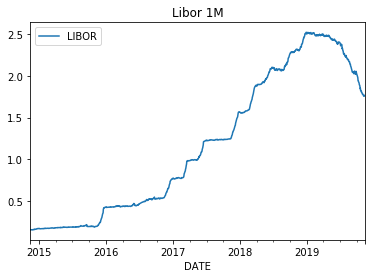

In [17]:
rates = RatesCurve()
rates.rates.plot(title = 'Libor 1M')
rates.get('2019-8-5')

In [18]:
futs = FuturesCurve()
futs.get('NQ','11/08/2019','09/10/2018')

8248.88461538

In [19]:
futs.get('ES','2019-8-5','1M')

2830.01758242

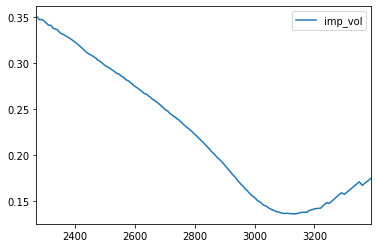

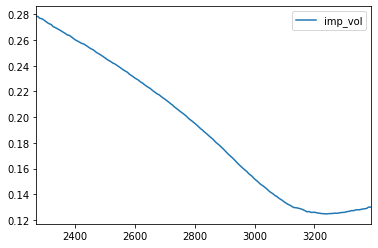

In [20]:
call_sep = 'data/opt/ES-SEP-IMM-C-050819.csv'
call_dec ='data/opt/ES-DEC-IMM-C-050819.csv'
put_sep = 'data/opt/ES-SEP-IMM-P-050819.csv'
put_dec = 'data/opt/ES-DEC-IMM-P-050819.csv'
vc = CreateVolCurve('ES','2019-8-5', call_sep, put_sep, call_dec, put_dec)
vc.vol_curve['IMM1'].plot()
vc.vol_curve['IMM2'].plot()

In [21]:
vc.fut_prices

{'IMM1_call': 2830.0,
 'IMM2_call': 2830.5,
 'IMM1_put': 2830.0,
 'IMM2_put': 2830.5}

In [22]:
VolCurve().vol_poly

{'ES':             ES_1M_a0  ES_1M_a1 ES_1M_a2 ES_1M_a3 ES_1M_a4 ES_1M_a5
 Date                                                              
 2016-11-14  0.125389  -0.98149  1.10072   89.172  1212.08  5270.38
 2016-11-15  0.115175 -0.828397  5.84525  107.234   256.24 -2667.22
 2016-11-16  0.117945 -0.876455   3.1337  93.8511  842.575  2281.31
 2016-11-17  0.114495 -0.860105  2.54365  93.9961   1043.3  3556.08
 2016-11-18   0.11176 -0.923185 -2.51703  86.6023  2617.47    15773
 ...              ...       ...      ...      ...      ...      ...
 2019-11-04  0.106172 -0.921082  10.2651  119.685 -423.431 -7027.53
 2019-11-05  0.109822 -0.938123  9.20946  114.168  -264.04 -5657.99
 2019-11-06  0.106926  -0.95403  9.38956    121.1 -317.332 -6465.49
 2019-11-07  0.107981 -0.936149  8.77747  110.521 -286.772 -5794.68
 2019-11-08  0.106136  -0.88919  7.58507  106.169 -36.9982  -3982.6
 
 [753 rows x 6 columns],
 'NQ':             NQ_1M_a0  NQ_1M_a1  NQ_1M_a2 NQ_1M_a3 NQ_1M_a4 NQ_1M_a5
 Date   

In [45]:
n = VolCurve().vol_poly['ES'].iloc[0]
n.name
n.name + relativedelta(months=1)

Timestamp('2016-12-14 00:00:00')

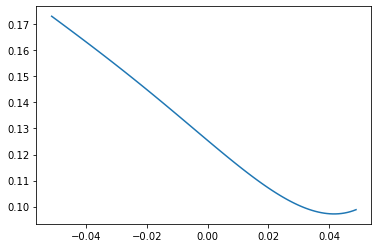

In [34]:
x = np.log(np.arange(0.95,1.05,0.001))
plt.plot(x,polyval(x,VolCurve().vol_poly['ES'].iloc[0]))

In [104]:
def delta_moneyness(x, vol, r, t, opt_type='call'):
    x = np.exp(x)
    if opt_type=='call':
        return delta(1 , x, vol , r, t, opt_type=opt_type)
    else:
        return delta(1 , x, vol , r, t, opt_type=opt_type)
        
        

In [118]:
delta_moneyness(-0.02696646524450024, 0.1514736566671469, vc.rate_curve.get(n.name), 1/12,opt_type='put')

-0.2500000000004119

In [105]:
delta(1 ,1, polyval(0.020195474476679794,n), vc.rate_curve.get(n.name), 1/12, opt_type='put')

-0.472029395482056

In [113]:
def find_delta(vol_poly, r, t, delta=0.25, opt_type='call'):
    x = newton( lambda x : abs(delta_moneyness(x, polyval(x,vol_poly), r, t, opt_type=opt_type)) - delta , 0)
    return x, polyval(x,vol_poly)


In [114]:
vc = VolCurve()
n = VolCurve().vol_poly['ES'].iloc[0]
n.name
n.name + relativedelta(months=1)
r = vc.rate_curve.get(n.name)
mon, vol = find_delta(n, r, 1/12,delta=0.25,opt_type='put')

In [115]:
print(mon, vol)

-0.02696646524450024 0.1514736566671469


In [39]:
VolCurve().vol_poly['ES']

,ES_1M_a0,ES_1M_a1,ES_1M_a2,ES_1M_a3,ES_1M_a4,ES_1M_a5
Date,,,,,,
2016-11-14,0.125389,-0.98149,1.10072,89.172,1212.08,5270.38
2016-11-15,0.115175,-0.828397,5.84525,107.234,256.24,-2667.22
2016-11-16,0.117945,-0.876455,3.1337,93.8511,842.575,2281.31
2016-11-17,0.114495,-0.860105,2.54365,93.9961,1043.3,3556.08
2016-11-18,0.11176,-0.923185,-2.51703,86.6023,2617.47,15773
...,...,...,...,...,...,...
2019-11-04,0.106172,-0.921082,10.2651,119.685,-423.431,-7027.53
2019-11-05,0.109822,-0.938123,9.20946,114.168,-264.04,-5657.99
2019-11-06,0.106926,-0.95403,9.38956,121.1,-317.332,-6465.49
